In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from scipy.stats import gaussian_kde

In [11]:
class Stock:
    def __init__(self , ticker , period , start , end):
        self.ticker = ticker
        self.period = period
        self.start = start
        self.end = end
        self.Ex_Shortfall = lambda changes , conf : np.mean(changes[changes > np.percentile(-1 * changes, conf * 100)])

    #  سود محاسبه میکنه
    def returns_period(self):
        data = yf.download(self.ticker , start = self.start , end = self.end)
        list_changes_peroid = []
        for i in range(0 , data.shape[0] , self.period):
            try:
                list_changes_peroid.append((data['Close'].iloc[i + self.period] - data['Close'].iloc[i]).values)
            except IndexError :
                pass
        list_changes_peroid = np.array(list_changes_peroid)
        return list_changes_peroid

    def show_details(self , bounds):
        list_changes = self.returns_period()
        print(f'Mean : {np.mean(list_changes)} , Median : {np.median(list_changes)} , Std : {np.std(list_changes)}')
        x = np.linspace(np.min(list_changes) , np.max(list_changes) , 25)
        bin_width = (x[1] - x[0])
        y = norm.pdf(x, np.mean(list_changes), np.std(list_changes)) * list_changes.shape[0] * bin_width
        # با کم و زیاد کردن مقدار bounds  میتوانیم یک ترید آف بین اورفیت شدن و آندرفیت بودن تابع برقرار کنیم
        kde = gaussian_kde(list_changes.flatten() , bw_method = bounds )
        y2 = kde(x)
        y_scaled = y2 * list_changes.shape[0] * (x[1] - x[0])
        fig , axes = plt.subplots(1 , 2 , figsize = (12,5))
        axes[0].hist(self.returns_period() , bins=25)
        axes[0].plot(x , y , label= 'Normal Distribution')
        axes[0].plot(x , y_scaled , label="KDE")
        axes[0].axvline(np.mean(list_changes) , color = 'red' , label = 'Mean' , linestyle = '--')
        axes[0].set_label('Mean')
        axes[0].axvline(np.median(list_changes) , color = 'blue' , label = 'Median' , linestyle = '--')
        
        axes[1].plot(self.show_Loss_dist(self.returns_period())[0] , self.show_Loss_dist(self.returns_period())[1] , label='PDF', color='blue')
        axes[1].grid(True)
        axes[1].set_title('Loss distribution')
        axes[1].set_xlabel('Values')
        axes[1].set_ylabel('Density')
        plt.legend()
        for conf_level in np.arange(0.9 , 1 , 0.01):
            print(f"for confidence Level {round(conf_level,2)} Expected Shortfall is {round(self.Ex_Shortfall(list_changes , conf_level) , 2)} and VaR is {-1 * np.percentile(-1 * list_changes, (1 - conf_level) * 100)}")

    def show_Loss_dist(self , changes):
        mean_loss = -1 * np.mean(changes)
        std_dev = np.std(changes)
        range_loss = np.arange(0,1,0.01)
        list2 = []
        for i in range_loss:
            list2.append(np.percentile(changes , (1 - i) * 100))
            # list2.append(norm.ppf(i, loc=mean_loss, scale=std_dev))
        list2 = list2[::-1]
        values = list2
        probabilities = 1 - range_loss
        probabilities = np.array(probabilities[1:])
        values = np.array(values[1:])

        pdf = -np.diff(probabilities) / np.diff(values) 
        x = (values[:-1] + values[1:]) / 2 
        return x , pdf
        
        
class Portofolio(Stock):
    def __init__(self, ticker, weights, period, start, end):
        super().__init__(ticker=ticker[0], period=period, start=start, end=end)
        self.tickers = ticker
        self.weights = weights

    def returns_period_all(self):
        ret_all = []
        for i in range(len(self.tickers)):
            self.ticker = self.tickers[i]  
            ret_all.append(self.returns_period())
        ret_all = np.array(ret_all)
        new_changes = np.ndarray.flatten(ret_all)
        new_changes = new_changes.reshape(len(self.tickers), int(len(new_changes) / len(self.tickers)))
        final_result = self.weights @ new_changes
        final_result = final_result.reshape(-1, 1)
        return final_result

for MSFT

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Mean : 0.19236738169541093 , Median : 0.21500015258789062 , Std : 4.071830327694241



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


for confidence Level 0.9 Expected Shortfall is 7.1 and VaR is 4.873008728027344
for confidence Level 0.91 Expected Shortfall is 7.24 and VaR is 5.137400817871095
for confidence Level 0.92 Expected Shortfall is 7.96 and VaR is 5.424411010742188
for confidence Level 0.93 Expected Shortfall is 8.36 and VaR is 5.7552896118164085
for confidence Level 0.94 Expected Shortfall is 8.7 and VaR is 6.124801330566411
for confidence Level 0.95 Expected Shortfall is 9.15 and VaR is 6.811010742187515
for confidence Level 0.96 Expected Shortfall is 9.96 and VaR is 7.269989013671875
for confidence Level 0.97 Expected Shortfall is 11.34 and VaR is 7.900018005371094
for confidence Level 0.98 Expected Shortfall is 13.12 and VaR is 8.951804809570332
for confidence Level 0.99 Expected Shortfall is 14.84 and VaR is 11.124809112548883


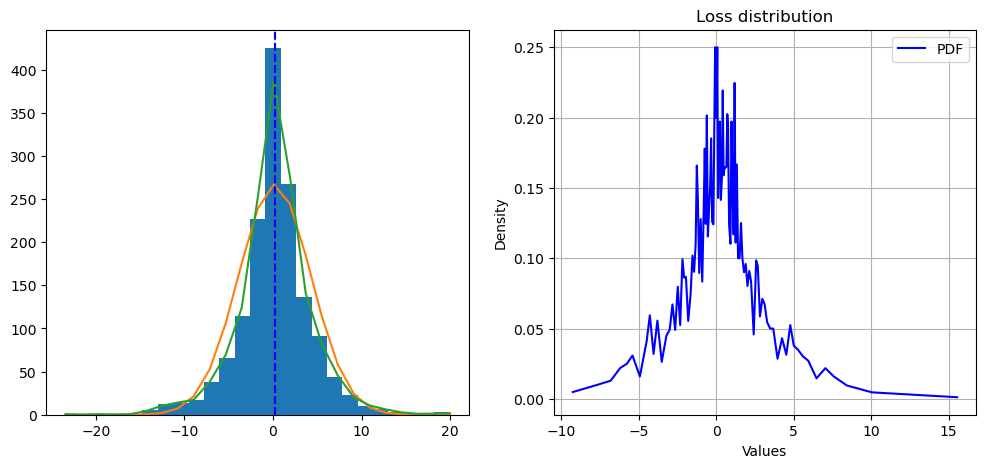

In [12]:
# for one stock
msft = Stock('MSFT' , 1 , '2018-01-01' , '2024-01-01')
msft.show_details(0.25)

for portofolio

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Mean : 0.09911472158659675 , Median : 0.10000038146972656 , Std : 2.212024988295786



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


for confidence Level 0.9 Expected Shortfall is 3.92 and VaR is 2.6029937744140628
for confidence Level 0.91 Expected Shortfall is 4.18 and VaR is 2.708497924804689
for confidence Level 0.92 Expected Shortfall is 4.45 and VaR is 2.9043957519531256
for confidence Level 0.93 Expected Shortfall is 4.6 and VaR is 3.2351025772094735
for confidence Level 0.94 Expected Shortfall is 4.78 and VaR is 3.435804748535157
for confidence Level 0.95 Expected Shortfall is 5.24 and VaR is 3.6764945983886728
for confidence Level 0.96 Expected Shortfall is 5.49 and VaR is 3.990001220703125
for confidence Level 0.97 Expected Shortfall is 5.94 and VaR is 4.427390899658211
for confidence Level 0.98 Expected Shortfall is 6.83 and VaR is 4.88299896240235
for confidence Level 0.99 Expected Shortfall is 8.34 and VaR is 6.045997772216828


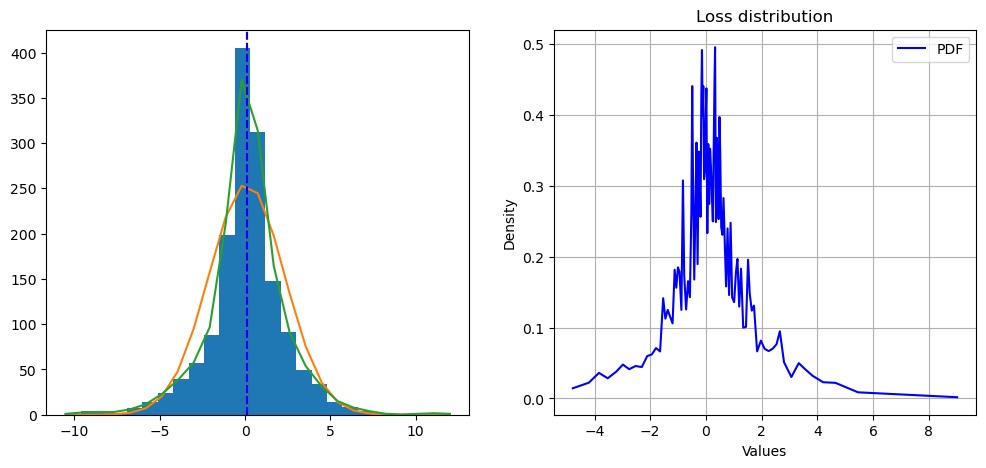

In [13]:
my_stocks = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA"]
weights = np.array([0.1 , 0.1 , 0.2 , 0.3 , 0.1])

stocks = Portofolio(my_stocks , weights , 1 , '2018-01-01' , '2024-01-01')
stocks.show_details(0.25)